In [7]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research', '/home/makoa/School/osrs_research']


In [9]:
with open('all.pickle','rb') as f:
    results = pickle.load(f)

In [10]:
len(results)

1072

In [12]:
results['F'].keys()

dict_keys(['numPrices', 'startMAE', 'endLoss', 'buySignal', 'numEpochs', 'predictions', 'perfect', 'budget', 'startLoss', 'endMAE', 'numBuys', 'testPrices', 'stock', 'buyAndHold', 'numSells', 'buyLimit', 'model', 'sellSignal', 'persist'])

In [13]:
modelProfs = [(item,results[item]['model']) for item in results ]
modelProfs = sorted(modelProfs, key=lambda x: x[1], reverse=True)

In [14]:
pprint(modelProfs[0:10])

[('CDNS', 0.3966056275122823),
 ('XLNX', 0.39600735296544315),
 ('GOL', 0.3583438343834385),
 ('EGO', 0.3465343203230148),
 ('SCG', 0.33919768639221803),
 ('SID', 0.3337004405286343),
 ('JCP', 0.30919463087248317),
 ('ERIE', 0.3002367557811686),
 ('SANM', 0.2844542447629548),
 ('NTRI', 0.2826968716289104)]


In [15]:
modVSpers = [(item,results[item]['model']-results[item]['persist']) for item in results ]
modVSbah = [(item,results[item]['model']-results[item]['buyAndHold']) for item in results ]

In [16]:
modVSpers = sorted(modVSpers, key=lambda x: x[1], reverse=True)
modVSbah = sorted(modVSbah, key=lambda x: x[1], reverse=True)

In [17]:
pprint(modVSpers[0:10])

[('GSL', 0.6028304160688669),
 ('AMD', 0.5903606557377052),
 ('UEPS', 0.49246406570841866),
 ('JCP', 0.46785234899328876),
 ('WTW', 0.4646450464702391),
 ('XLNX', 0.3733354674974507),
 ('URBN', 0.3523696682464458),
 ('TK', 0.33722666366400167),
 ('CLF', 0.33651420539890964),
 ('NKTR', 0.33305757261410807)]


In [18]:
for a in modVSpers[0:10]:
    prices = items.getPrices(a[0])
    prices = prices[int(.85*len(prices)):]
    plt.plot(prices)
    plt.show()

KeyError: 'GSL'

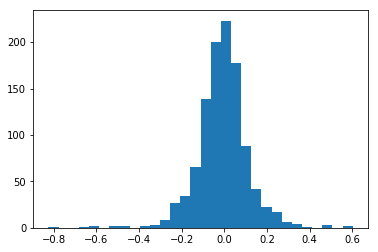

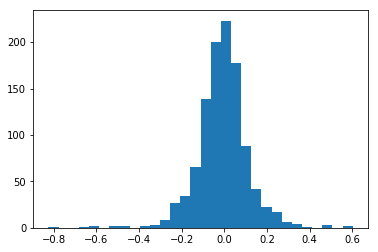

In [19]:
plt.hist([a[1] for a in modVSpers],30)
plt.show()
plt.hist([a[1] for a in modVSpers if a[1]>-2 and a[1]<2],30)
plt.show()

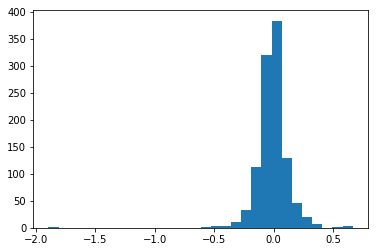

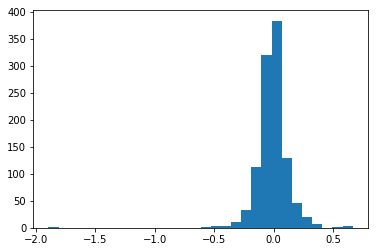

In [20]:
plt.hist([a[1] for a in modVSbah],30)
plt.show()
plt.hist([a[1] for a in modVSbah if a[1]>-2 and a[1]<2],30)
plt.show()

In [21]:
numProfModels = len([a for a in modelProfs if a[1]>0])
numProfmodVSpers = len([a for a in modVSpers if a[1]>0])
numProfmodVSbah = len([a for a in modVSbah if a[1]>0])

In [22]:
print(len(results))
print(numProfModels/len(results))
print(numProfmodVSpers/len(results))
print(numProfmodVSbah/len(results))

1072
0.4375
0.47294776119402987
0.4300373134328358


In [23]:
actualModProfs = [(item,items.getPrices(item)[-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfs = sorted(actualModProfs, key=lambda x: x[1], reverse=True)

KeyError: 'AEP'

In [17]:
actualModProfsPerDay = [(item,(items.getPrices(item)[-1]*results[item]['model'])/(results[item]['numPrices']*.15)) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfsPerDay = sorted(actualModProfsPerDay, key=lambda x: x[1], reverse=True)

In [18]:
actualModProfs[0:10]

[('Staff_of_the_dead', 1965194.309848581),
 ('Serpentine_helm_(uncharged)', 1927839.399861346),
 ("Pharaoh's_sceptre_(3)", 1899512.1482569817),
 ("Rangers'_tunic", 1635614.6261509578),
 ('Old_school_bond', 1621832.7969592186),
 ('Magic_fang', 1601627.6518157746),
 ('Tanzanite_fang', 1209301.143473894),
 ('Toxic_blowpipe_(empty)', 1155358.669904674),
 ("Ahrim's_armour_set", 1073734.8876280128),
 ('Dragon_pickaxe', 928540.1932421485)]

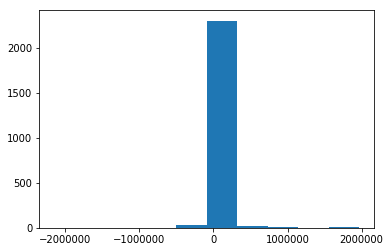

In [19]:
plt.hist([a[1] for a in actualModProfs])
plt.show()

In [26]:
#prices = [items.getPrices(item)[-1] for item in results]
#buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [28]:
print(np.corrcoef(profs,pers)[0][1])
print(np.corrcoef(profs,perf)[0][1])
print(np.corrcoef(profs,bah)[0][1])
print(np.corrcoef(profs,mae)[0][1])
print(np.corrcoef(prof_perf_diff,mae)[0][1])

0.2543439533057813
0.11041252616171729
0.510616675549497
0.00430285300529169
0.047653236297550076


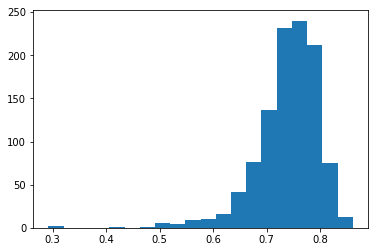

In [30]:
plt.hist(mae,20)
plt.show()